In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
train_org = df1.copy()
test_org = df2.copy()

In [3]:
list_catagory_columns = ['department','region','education','gender','recruitment_channel']

In [4]:
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df1.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [6]:
df1.education.fillna(method='ffill',inplace=True)
df2.education.fillna(method='ffill',inplace=True)

In [7]:
df1.previous_year_rating.fillna(method='ffill',inplace=True)
df2.previous_year_rating.fillna(method = 'ffill',inplace = True)

In [8]:
def dict_map(column,df):
    dict={}
    i=0
    for x in df[column].unique():
        dict[x]=i
        i+=1
    return dict


In [9]:
for column in list_catagory_columns:
    df1[column] = df1[column].map(dict_map(column,df1))  #changing catagorical values to nameric

In [10]:
for column in list_catagory_columns:
    df2[column] = df2[column].map(dict_map(column,df2))


In [11]:
df1['service_per_age'] =df1.length_of_service/df1.age
df2['service_per_age'] =df2.length_of_service/df2.age

In [12]:
df1['scores'] = df1['awards_won?']*10 + df1['avg_training_score']
df2['scores'] = df2['awards_won?']*10 + df2['avg_training_score']

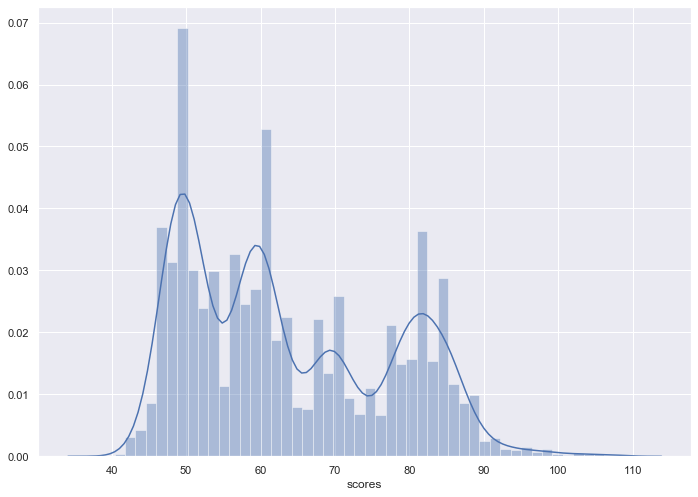

In [13]:
sns.distplot(df1.scores)

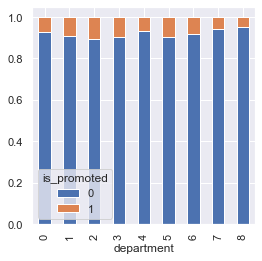

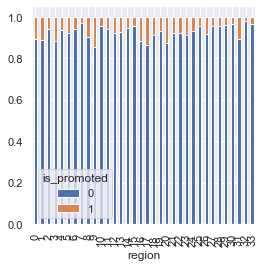

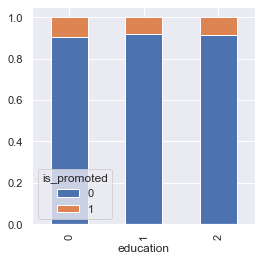

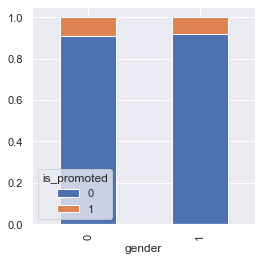

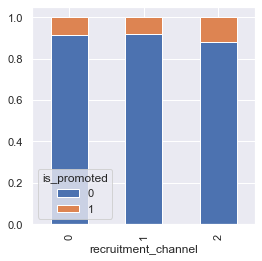

In [14]:
def draw_dependent_interestrate(x):
    X=pd.crosstab(x,df1.is_promoted)
    X.div(X.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
list_catagory_columns = ['department','region','education','gender','recruitment_channel']
for name in list_catagory_columns:
    draw_dependent_interestrate(df1[str(name)])

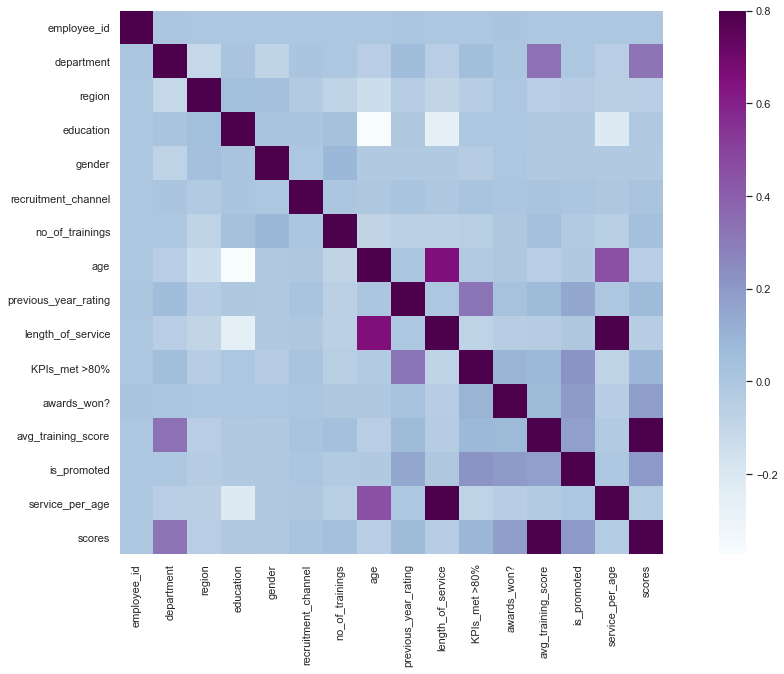

In [15]:
matrix = df1.corr() 
plt.figure(figsize=(20,10))
ax = sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", linecolor='white')
ax

In [19]:
from sklearn.utils import resample

In [20]:
df1_majority = df1[df1.is_promoted ==0]
df1_minority = df1[df1.is_promoted ==1]

In [21]:
(len(df1_majority)-len(df1_minority))

45472

In [22]:
df1_minority_upsampled = resample(df1_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=45472,    # to match majority class
                                 random_state=123) # reproducible results

In [23]:
df1_upsampled = pd.concat([df1_majority, df1_minority_upsampled])
 

In [24]:
df1_upsampled.is_promoted.value_counts()

0    50140
1    45472
Name: is_promoted, dtype: int64

In [25]:
X = df1_upsampled.drop(['employee_id','awards_won?','avg_training_score','length_of_service','age','is_promoted'],
             axis=1)
y=df1_upsampled.is_promoted

In [26]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import f1_score,accuracy_score


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y_pred = clf.predict(X_test)
print('f1 score of Dclf is: ' ,f1_score(y_pred,y_test))
print('accuracy of Dclf is: ',accuracy_score(y_pred,y_test))


f1 score of Dclf is:  0.9654808402829094
accuracy of Dclf is:  0.9658003451341317


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model =RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
model.predict(X_test)
print('f1 score of Rforest is: ' ,f1_score(model.predict(X_test),y_test))
print('accuracy of Rforest is: ',accuracy_score(model.predict(X_test),y_test))

f1 score of Rforest is:  0.9815411032410388
accuracy of Rforest is:  0.9820111907127542


In [42]:
from xgboost import XGBClassifier

In [43]:
model2=XGBClassifier()
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
model2.predict(X_test)
print('f1 score of XGBclf is: ' ,f1_score(model2.predict(X_test),y_test))
print('accuracy of XGBclf is: ',accuracy_score(model2.predict(X_test),y_test))

f1 score of XGBclf is:  0.8837304219172492
accuracy of XGBclf is:  0.880824138471997


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn.predict(X_test)
print('f1 score of XGBclf is: ' ,f1_score(knn.predict(X_test),y_test))
print('accuracy of XGBclf is: ',accuracy_score(knn.predict(X_test),y_test))

f1 score of XGBclf is:  0.8124616956077629
accuracy of XGBclf is:  0.8740395170142701


In [34]:
#so XGB clf ,model2 , has more accuracy than others 
sub =df2.drop(['employee_id','awards_won?','avg_training_score','length_of_service','age'],
             axis=1)
sub.previous_year_rating.fillna(method='bfill',inplace=True)
sub.isna().sum()



department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
previous_year_rating    0
KPIs_met >80%           0
service_per_age         0
scores                  0
dtype: int64

In [45]:
submission = model2.predict(sub)

In [49]:
df2['is_promoted'] = submission

In [50]:
from sklearn.metrics import roc_auc_score

In [52]:
prob_y_2 = model2.predict_proba(X_train)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5]

[0.0020347782, 0.00011098625, 0.002078634, 0.69486797, 0.008282589]

In [47]:
df2[['employee_id','is_promoted']].set_index('employee_id').to_csv('Submission.csv')

In [48]:
len(df1_upsampled.loc[df1['is_promoted']==0])/len(df1)

0.9148299518318493

In [40]:
df1_upsampled.is_promoted.value_counts()

0    50140
1    45472
Name: is_promoted, dtype: int64

0.08668214862681745